### Mean Shift 군집화

Mean Shift는 KDE(확률분포)를 이용하여 데이터 포인트들이 데이터 분포 높은곳으로 이동하며 군집화 수행    
별도 군집화 개수 지정 안하고 데이터 분포도 기반하여 자동으로 군집화 개수 정함     
1. 개별 데이터 특정 반경내 주변 데이터 포함한 데이터 분포도 계산
2. 데이터 분포도 높은 방향으로 중심점 이동(마치 태풍의 눈 이동하듯)
3. 중심점을 따라 해당 데이터 이동
4. 이동된 데이터 특벙 반경내 다시 데이터 분포 계산 후 2, 3 반복
5. 가장 분포도 높은 곳으로 이동시 더이상 해당 데이터 움직이지 않고 수렴
6. 모든 데이터 1~5 수행하며 군집 중심점 찾음

### KDE(Kernel Density Estimation)의 이해

KDE는 커널 함수를 통해 어떤 변수의 확률밀도 함수 추정 방식    
관측된 데이터 각각에 커널 함수 적용한 값을 모두 더한뒤 데이터 건수로 나누어 확률밀도함수(pdf) 추정    

#### 확률 밀도 추정 방법    
1. 모수적(Parametric) 추정    
* 데이터가 특정 데이터 분포를 따른다는 가정하에 데이터 분포 찾는 방법 ex) Gaussian Mixture    
2. 비모수적(Non-Parametric) 추정   
* 데이터가 특정 분포를 따르지 않는다는 가정 하에 밀도 추정    
* 관측된 데이터 만으로 확률밀도 찾는 방법으로 대표적으로 KDE

#### 비모수적 밀도 추정 - 히스토그램(Histogram)    
Bin의 경계에서 불연속성, Bin의 크기에 따라 히스토그램 달라짐    
#### 비모수적 밀도 추정 - KDE    
개별 관측 데이터들에 커널함수 적용 후 커널함수의 적용값들 모두 합하고 개별 관측 데이터 건수로 나누어 확률밀도함수 추정    
대표적으로 가우시안 분포함수로, 합산시 함수 형태가 원본보다 오른쪽으로 뚱뚱하다    

### KDE와 가우시안 커널함수

K는 커널함수 x는 random variable, xi는 관측값, h는 bandwidth일 때,    
KDE = (1 / n) Σ Kh (x - xi) = (1 / nh) Σ K( (x - xi) / h )    
대표적 커널함수는 가우시안 분포, f(xㅣu, σ^2) = (1 / sqrt(2πσ^2)) e^[-{(x - u)^2} / 2σ^2]    
xi는 평균, bandwidth h는 표준편차와 동일할때 가우시안 커널함수를 적용한 KDE는 다음과 같음    
KDE = (1 / nh) Σ (1 / sqrt(2)πh) e^[ -(x - u)^2 / 2σ^2 ]    
가우시안 커널함수 적용시 최적의 bandwidth는 아래와 같음    
h = (4σ^5 / 3n)^(1/5) ≈ 1.06σn^(-1/5) (n: 샘플 데이터 개수, σ: 샘플 데이터 표준편차)    

#### Bandwidth에 따른 KDE의 변화

h = 1.0 then 뾰족뾰족하고 차수 높은듯한 함수    
h = 2.5 then 봉오리 개수 3개로 줄음    
h = 5.0 then 데이터 깔아뭉개고 봉오리 없어짐    
h = 10.0 then 완전히 평평해짐    
작은 h값은 좁고 Spike한 KDE로 변동성이 큰 확률밀도함수를 추정(오버피팅)    
큰 h값은 과도하게 Smoothing된 KDE로 단순화된 확률밀도함수를 추정(언더피팅)    
MeanShift는 Bandwidth가 클수록 적은 수의 클러스터링 중심점을, 작을수록 많은 수의 클러스터링 중심점 가짐    
MeanShift는 군집의 개수를 지정하지 않으며 오직 Bandwidth의 크기에 따라 군집화 수행    
Bandwidth: 2 then 점 3개정도, 지도처럼 클린하게 됨
Bandwidth: 0.8 then 점들 많아지고, 위상수학 그림처럼 난잡하게 됨    
최적의 bandwidth 계산 위해 사이킷런의 estimate_bandwidth() 사용

**seaborn의 distplot()을 이용하여 KDE 시각화**  
https://seaborn.pydata.org/tutorial/distributions.html

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877]


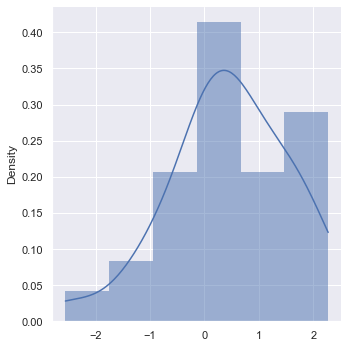

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(color_codes=True)

np.random.seed(0)
x = np.random.normal(0, 1, size=30)
print(x)
sns.displot(x, kde=True, stat="density", linewidth=0);
#sns.distplot(x)

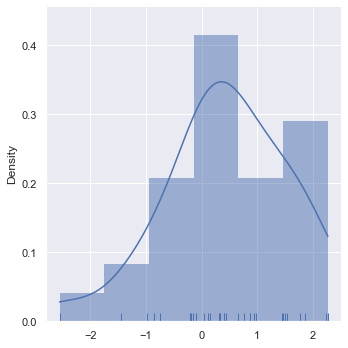

In [2]:
sns.displot(x, kde=True, stat="density", linewidth=0, rug=True)
#sns.distplot(x, rug=True)

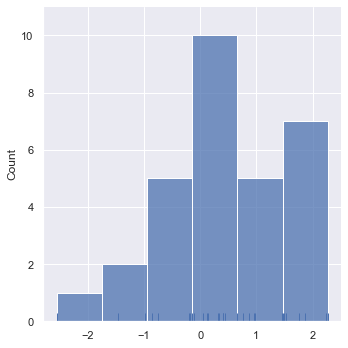

In [3]:
sns.displot(x, kde=False, rug=True)
#sns.distplot(x, kde=False, rug=True)

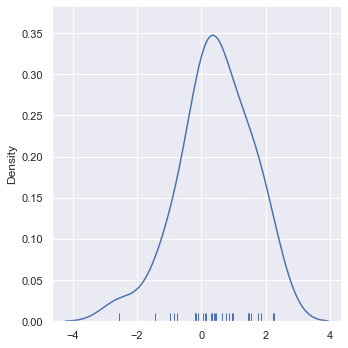

In [4]:
sns.displot(x, rug=True, kind="kde");
#sns.distplot(x, hist=False, rug=True);

**개별 관측데이터에 대해 가우시안 커널 함수를 적용**

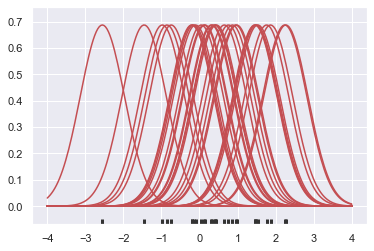

In [5]:
from scipy import stats

#x = np.random.normal(0, 1, size=30)
#bandwidth 표준편차
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x: #개별 관측값
    kernel = stats.norm(x_i, bandwidth).pdf(support) #정규분포
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

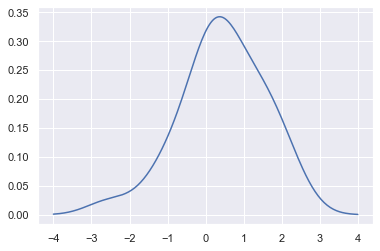

In [6]:
from scipy.integrate import trapz
density = np.sum(kernels, axis=0) #커널함수 적용값 더함
density /= trapz(density, support) #정규화
plt.plot(support, density);

**seaborn은 kdeplot()으로 kde곡선을 바로 구할 수 있음**

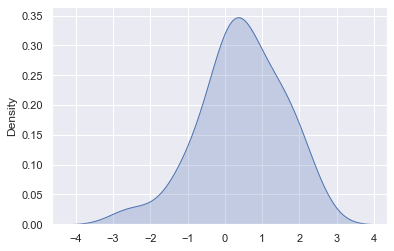

In [7]:
sns.kdeplot(x, shade=True);

**bandwidth에 따른 KDE 변화**

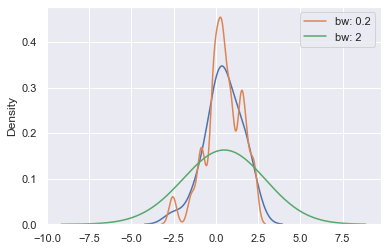

In [8]:
sns.kdeplot(x)
sns.kdeplot(x, bw_method=.2, label="bw: 0.2") #오퍼피팅
sns.kdeplot(x, bw_method=2, label="bw: 2") #언더피팅, 과도한 스무딩
plt.legend();

### 사이킷런을 이용한 Mean Shift 

make_blobs()를 이용하여 2개의 feature와 3개의 군집 중심점을 가지는 임의의 데이터 200개를 생성하고 MeanShift를 이용하여 군집화 수행

In [9]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.8, random_state=0)

meanshift= MeanShift(bandwidth=0.9)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels)) #총 200개지만 unique하면 7개

cluster labels 유형: [0 1 2 3 4 5 6 7]


**커널함수의 bandwidth크기를 1로 약간 증가 후에 Mean Shift 군집화 재 수행**

In [10]:
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


**최적의 bandwidth값을 estimate_bandwidth()로 계산 한 뒤에 다시 군집화 수행**

In [11]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X,quantile=0.25) #데이터 많으면 quantile 늘려줌
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.689


In [12]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X, quantile=0.25)

meanshift= MeanShift(best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))    

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass bandwidth=1.6889636737559222 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


cluster labels 유형: [0 1 2]


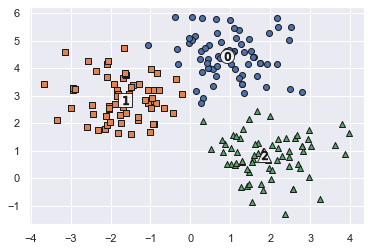

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 marker로 scatter plot 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                edgecolor='k', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)
    
plt.show()

In [14]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       2                  67
2       1                  65
        2                   1
Name: meanshift_label, dtype: int64
